# Introduction

Here we look at using CLIP to capture meta-data about images. This application would be ideal for computer vision deployed at the edge. Instead of keeping all the frames in a video - which quickly adds up to Terabytes, we could send a little bit of highly summarised information using CLIP image embeddings every second, or every few seconds. This removes a lot of storage costs and means that we can have intelligence without streaming the video over the internet.

# Import necesarry libraries

In [1]:
import os

import torch
import numpy as np
from PIL import Image

# Load CLIP

In [20]:
from clip import clip

model, preprocess_img = clip.load('ViT-B/32')

# Encode a test image

## Load the image

In [3]:
test_img_path = './images/n07920052_espresso.jpeg'

In [4]:
with Image.open(test_img_path) as f:
    test_img = f.convert('RGB')

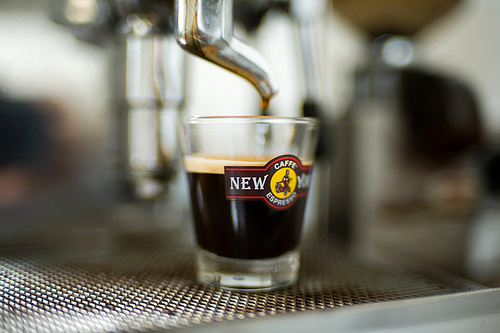

In [5]:
test_img

## Run inference

In [6]:
image_proc = preprocess_img(test_img).unsqueeze(0)

In [7]:
image_proc.shape

torch.Size([1, 3, 224, 224])

In [15]:
with torch.no_grad():
    image_features = model.encode_image(image_proc).float()
    image_features = image_features / image_features.norm(dim = -1, keepdim = True)

In [16]:
image_features.shape

torch.Size([1, 512])

# Compare sizes

In [17]:
# Reduce precision slightly to half array size
image_features_numpy = image_features.numpy().astype(np.float16)

In [18]:
test_img_bytes = os.path.getsize(test_img_path)
numpy_bytes = image_features_numpy.nbytes

print(f'Original image size: {test_img_bytes:,} bytes')
print(f'Image features size: {numpy_bytes:,} bytes')

Original image size: 80,142 bytes
Image features size: 1,024 bytes


We now have a vector which has a large amount of contextual information contained in it, and it is a fraction of the size of the original image. Because CLIP is trained contrastively against text we can use this later to do other cool things, like search (this will be explored in one of the other notebooks).